## LeNet Architectures on CIFAR 10 Dataset via TensorFlow

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import (Input, Activation, Dense, Flatten, Conv2D, 
                                     MaxPooling2D, Dropout, BatchNormalization)
from matplotlib import pyplot as plt
import os

In [2]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.1.0
Eager mode:  True
GPU is available


Settings

In [4]:
# Константы - параметры нейросети
batch_size = 32
NUM_CLASSES = 10
INPUT_SHAPE = (32, 32, 3)
epochs = 10
random_seed = 42
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')

Используемые архитектуры

In [5]:
# Lenet из примера
def lenet(input_shape=INPUT_SHAPE, num_classes=NUM_CLASSES, use_dropout=False, name='lenet'):
    model = Sequential(name=name)
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    if use_dropout:
        model.add(Dropout(0.25))
            
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    if use_dropout:
        model.add(Dropout(0.25))
    
    # Dense layers:
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    if use_dropout:
        model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model


# Классическая Lenet_5
def lenet_5(input_shape=INPUT_SHAPE, num_classes=NUM_CLASSES, name='lenet'):
    model = Sequential(name=name)
    model.add(Conv2D(6, kernel_size=(5, 5), padding='same', activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model



def alexnet(input_shape=INPUT_SHAPE, num_classes=NUM_CLASSES, name='alexnet'):
    model = Sequential(name=name)
    model.add(Conv2D(96, kernel_size=(11, 11), padding='same', activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Conv2D(256, kernel_size=(5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model



# Настройка остановки обучения
class oneCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.99):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


#### Обучение классической lenet (lenet_5)

In [65]:
model = lenet_5()
# компиляция модели

# инициализация RMSprop optimizer
opt = optimizers.RMSprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)


# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, 'lenet_5')
model.save(model_path)
print('Successfully saved model to %s ' % model_path)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 14s 280us/sample - loss: 1.9003 - accuracy: 0.3084 - val_loss: 1.7323 - val_accuracy: 0.3854
Epoch 2/10
50000/50000 [==============================] - 11s 215us/sample - loss: 1.6278 - accuracy: 0.4110 - val_loss: 1.5983 - val_accuracy: 0.4264
Epoch 3/10
50000/50000 [==============================] - 10s 202us/sample - loss: 1.5279 - accuracy: 0.4469 - val_loss: 1.4999 - val_accuracy: 0.4594
Epoch 4/10
50000/50000 [==============================] - 10s 208us/sample - loss: 1.4661 - accuracy: 0.4692 - val_loss: 1.4266 - val_accuracy: 0.4855
Epoch 5/10
50000/50000 [==============================] - 10s 207us/sample - loss: 1.4206 - accuracy: 0.4890 - val_loss: 1.4123 - val_accuracy: 0.4935
Epoch 6/10
50000/50000 [==============================] - 9s 183us/sample - loss: 1.3845 - accuracy: 0.5044 - val_loss: 1.3752 - val_accuracy: 0.5038
Epoch 7/10
50000/50000 [=====================

#### Обучение модифицированной lenet

In [62]:
model = lenet()
# компиляция модели

# инициализация RMSprop optimizer
opt = optimizers.RMSprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)


# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, 'lenet')
model.save(model_path)
print('Successfully saved model to %s ' % model_path)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 23s 452us/sample - loss: 1.6439 - accuracy: 0.4120 - val_loss: 1.6140 - val_accuracy: 0.4520
Epoch 2/10
50000/50000 [==============================] - 21s 429us/sample - loss: 1.3187 - accuracy: 0.5347 - val_loss: 1.3185 - val_accuracy: 0.5404
Epoch 3/10
50000/50000 [==============================] - 21s 427us/sample - loss: 1.1659 - accuracy: 0.5910 - val_loss: 1.1135 - val_accuracy: 0.6102
Epoch 4/10
50000/50000 [==============================] - 22s 435us/sample - loss: 1.0544 - accuracy: 0.6294 - val_loss: 1.0441 - val_accuracy: 0.6328
Epoch 5/10
50000/50000 [==============================] - 22s 441us/sample - loss: 0.9700 - accuracy: 0.6617 - val_loss: 1.0191 - val_accuracy: 0.6450
Epoch 6/10
50000/50000 [==============================] - 21s 412us/sample - loss: 0.8972 - accuracy: 0.6892 - val_loss: 1.0179 - val_accuracy: 0.6481
Epoch 7/10
50000/50000 [====================

#### Обучение на архитектуре alexnet

In [ ]:
model = alexnet()

# инициализация RMSprop optimizer
opt = optimizers.RMSprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)


# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, 'alexnet')
model.save(model_path)
print('Successfully saved model to %s ' % model_path)

Повысим лимит эпох и проверим реальную обучаемость модели

In [6]:
model = lenet()
callbacks = oneCallback()

# инициализация Adam optimizer
opt = optimizers.Adam()

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=50,
          validation_data=(x_test, y_test),
          shuffle=True,
          callbacks=[callbacks])


# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, 'lenet')
model.save(model_path)
print('Successfully saved model to %s ' % model_path)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 252us/sample - loss: 1.3545 - accuracy: 0.5097 - val_loss: 1.0865 - val_accuracy: 0.6107
Epoch 2/50
50000/50000 [==============================] - 12s 243us/sample - loss: 0.8870 - accuracy: 0.6889 - val_loss: 0.8228 - val_accuracy: 0.7158
Epoch 3/50
50000/50000 [==============================] - 14s 272us/sample - loss: 0.6784 - accuracy: 0.7640 - val_loss: 0.7529 - val_accuracy: 0.7406
Epoch 4/50
50000/50000 [==============================] - 14s 276us/sample - loss: 0.5258 - accuracy: 0.8166 - val_loss: 0.7611 - val_accuracy: 0.7485
Epoch 5/50
50000/50000 [==============================] - 14s 274us/sample - loss: 0.3919 - accuracy: 0.8617 - val_loss: 0.8014 - val_accuracy: 0.7492
Epoch 6/50
50000/50000 [==============================] - 14s 273us/sample - loss: 0.2852 - accuracy: 0.9001 - val_loss: 0.8797 - val_accuracy: 0.7565
Epoch 7/50
50000/50000 [====================

Successfully saved model to C:\Users\Nickel\1_Py_NoteBooks\GU_Introduction_To_Deep_Learning\saved_models\lenet 


### Тестирование различных оптимизаторов

Используем серию оптимизаторов из официальной документации https://www.tensorflow.org/api_docs/python/tf/keras/optimizers?hl=ru

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [67]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
# Настройки цветовой схемы в логах:
log_begin_red, log_begin_blue, log_begin_green = '\033[91m', '\n\033[94m', '\033[92m'
log_begin_bold, log_begin_underline = '\033[1m', '\033[4m'
log_end_format = '\033[0m'

optimizers_examples = {
    'sgd': optimizers.SGD(),
    'momentum': optimizers.SGD(momentum=0.9),
    'nag': optimizers.SGD(momentum=0.9, nesterov=True),
    'adagrad': optimizers.Adagrad(),
    'adadelta': optimizers.Adadelta(),
    'rmsprop': optimizers.RMSprop(),
    'adam': optimizers.Adam()
}

In [69]:
history_per_optimizer = dict()

print("{0}start{1} learning:".format(log_begin_red, log_end_format))
for optimizer_name in optimizers_examples:
    # Resetting the seeds (for random number generation), to reduce the impact of randomness on the comparison:
    tf.random.set_seed(42)
    np.random.seed(42)
    # Creating the model:
    model = lenet_5(name="lenet_{}".format(optimizer_name))
    optimizer = optimizers_examples[optimizer_name]
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # Launching the training (we set `verbose=0`, so the training won't generate any logs):
    print("\t> Training with {0}: {1}start{2}".format(
        optimizer_name, log_begin_red, log_end_format))
    history = model.fit(x_train, y_train,
                        batch_size=32, epochs=epochs, validation_data=(x_test, y_test),
                        verbose=1)
    history_per_optimizer[optimizer_name] = history
    print('\t> Training with {0}: {1}done{2}.'.format(
        optimizer_name, log_begin_green, log_end_format))
print("Experiment: {0}done{1}".format(log_begin_green, log_end_format))

start learning:
	> Training with sgd: start
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 175us/sample - loss: 2.6232 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 2/10
50000/50000 [==============================] - 9s 185us/sample - loss: 2.3027 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy: 0.0999
Epoch 3/10
50000/50000 [==============================] - 8s 167us/sample - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
50000/50000 [==============================] - 9s 171us/sample - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
50000/50000 [==============================] - 9s 177us/sample - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 6/10
50000/50000 [==============================] - 8s 153us/sample - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 8s 157us/sample - loss: 1.9886 - accuracy: 0.3338 - val_loss: 1.7509 - val_accuracy: 0.3707
Epoch 2/10
50000/50000 [==============================] - 8s 152us/sample - loss: 1.5773 - accuracy: 0.4468 - val_loss: 1.6269 - val_accuracy: 0.4343
Epoch 3/10
50000/50000 [==============================] - 8s 157us/sample - loss: 1.4809 - accuracy: 0.4824 - val_loss: 1.5611 - val_accuracy: 0.4628
Epoch 4/10
50000/50000 [==============================] - 7s 150us/sample - loss: 1.4217 - accuracy: 0.5100 - val_loss: 1.4720 - val_accuracy: 0.4859
Epoch 5/10
50000/50000 [==============================] - 7s 150us/sample - loss: 1.3827 - accuracy: 0.5267 - val_loss: 1.4004 - val_accuracy: 0.5055
Epoch 6/10
50000/50000 [==============================] - 8s 154us/sample - loss: 1.3513 - accuracy: 0.5411 - val_loss: 1.4113 - val_accuracy: 0.5111
Epoch 7/10
50000/50000 [==========================

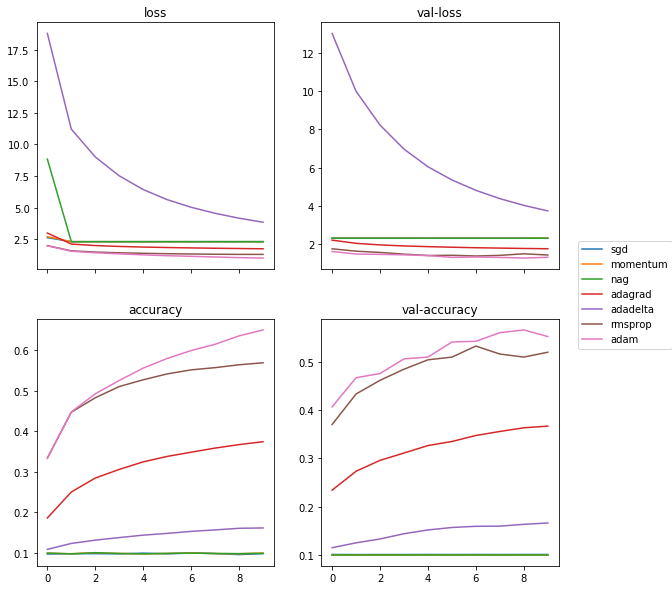

In [70]:
fig, ax = plt.subplots(2, 2, figsize=(10,10), sharex='col')
ax[0, 0].set_title("loss")
ax[0, 1].set_title("val-loss")
ax[1, 0].set_title("accuracy")
ax[1, 1].set_title("val-accuracy")

lines, labels = [], []
for optimizer_name in history_per_optimizer:
    history = history_per_optimizer[optimizer_name]
    ax[0, 0].plot(history.history['loss'])
    ax[0, 1].plot(history.history['val_loss'])
    ax[1, 0].plot(history.history['accuracy'])
    line = ax[1, 1].plot(history.history['val_accuracy'])
    lines.append(line[0])
    labels.append(optimizer_name)

fig.legend(lines,labels, loc='center right', borderaxespad=0.1)
plt.subplots_adjust(right=0.85)

In [ ]:
# Test accuracy: 0.7287

### Тестирование различных параметров - dropout, regularization, batchnorm 

In [10]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [19]:
# Список тестируемых параметров
configurations = {
    'none':         {'use_dropout': False, 'use_batchnorm': False, 'regularizer': None},
    'l1':           {'use_dropout': False, 'use_batchnorm': False, 'regularizer': tf.keras.regularizers.l1(0.01)},
    'l2':           {'use_dropout': False, 'use_batchnorm': False, 'regularizer': tf.keras.regularizers.l2(0.01)},
    'dropout':      {'use_dropout': True,  'use_batchnorm': False, 'regularizer': None},
    'bn':           {'use_dropout': False, 'use_batchnorm': True,  'regularizer': None},
    'l1_dropout':   {'use_dropout': False, 'use_batchnorm': True,  'regularizer': tf.keras.regularizers.l1(0.01)},
    'l1_bn':        {'use_dropout': False, 'use_batchnorm': True,  'regularizer': tf.keras.regularizers.l1(0.01)},
    'l1_dropout_bn':{'use_dropout': False, 'use_batchnorm': True,  'regularizer': tf.keras.regularizers.l1(0.01)}
}

# Видоизмененная Lenet c дополнительными опциями
def lenet_customized(name='lenet', input_shape=INPUT_SHAPE,
          use_dropout=False, use_batchnorm=False, regularizer=None):
    
    layers = []
    
    # 1st block:
    layers += [Conv2D(6, kernel_size=(5, 5), padding='same', 
                      input_shape=input_shape, kernel_regularizer=regularizer)]
    if use_batchnorm:
        layers += [BatchNormalization()]
    layers += [Activation('relu'),
               MaxPooling2D(pool_size=(2, 2))]
    if use_dropout:
        layers += [Dropout(0.25)]
        
    # 2nd block:
    layers += [ 
        Conv2D(16, kernel_size=(5, 5), kernel_regularizer=regularizer)]
    if use_batchnorm:
        layers += [BatchNormalization()]
    layers += [Activation('relu'),
               MaxPooling2D(pool_size=(2, 2))]
    if use_dropout:
        layers += [Dropout(0.25)]
 
    # Dense layers:
    layers += [Flatten()]
    
    layers += [Dense(120, kernel_regularizer=regularizer)]
    if use_batchnorm:
        layers += [BatchNormalization()]
    layers += [Activation('relu')]
    if use_dropout:
        layers += [Dropout(0.25)]
        
    layers += [Dense(84, kernel_regularizer=regularizer)]
    layers += [Activation('relu')]
        
    layers += [Dense(NUM_CLASSES, activation='softmax')]
    
    model = Sequential(layers, name=name)
    return model

In [26]:
history_per_instance = dict()
epochs=30

print("Experiment: {0}start{1} (training logs = off)".format(log_begin_red, log_end_format))
for config_name in configurations:
    # Resetting the seeds (for random number generation), to reduce the impact of randomness on the comparison:
    tf.random.set_seed(random_seed)
    np.random.seed(random_seed)
    # Creating the model:
    model = lenet_customized("lenet_{}".format(config_name), **configurations[config_name])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # Launching the training (we set `verbose=0`, so the training won't generate any logs):
    print("\t> Training with {0}: {1}start{2}".format(
        config_name, log_begin_red, log_end_format))
    history = model.fit(x_train, y_train,
                        batch_size=32, epochs=epochs, validation_data=(x_test, y_test),
                        verbose=0)
    history_per_instance[config_name] = history
    print('\t> Training with {0}: {1}done{2}.'.format(
        config_name, log_begin_green, log_end_format))
print("Experiment: {0}done{1}".format(log_begin_green, log_end_format))

Experiment: start (training logs = off)
	> Training with none: start
	> Training with none: done.
	> Training with l1: start
	> Training with l1: done.
	> Training with l2: start
	> Training with l2: done.
	> Training with dropout: start
	> Training with dropout: done.
	> Training with bn: start
	> Training with bn: done.
	> Training with l1_dropout: start
	> Training with l1_dropout: done.
	> Training with l1_bn: start
	> Training with l1_bn: done.
	> Training with l1_dropout_bn: start
	> Training with l1_dropout_bn: done.
Experiment: done


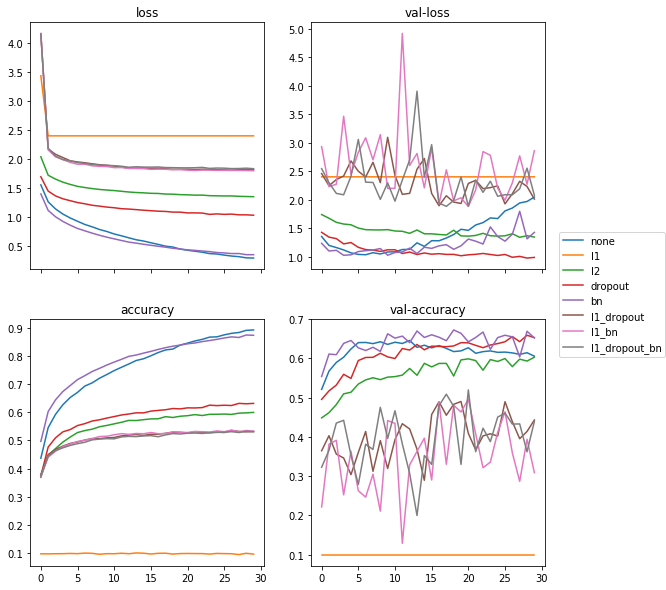

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(10,10), sharex='col') # add parameter `sharey='row'` for a more direct comparison
ax[0, 0].set_title("loss")
ax[0, 1].set_title("val-loss")
ax[1, 0].set_title("accuracy")
ax[1, 1].set_title("val-accuracy")

lines, labels = [], []
for config_name in history_per_instance:
    history = history_per_instance[config_name]
    ax[0, 0].plot(history.history['loss'])
    ax[0, 1].plot(history.history['val_loss'])
    ax[1, 0].plot(history.history['accuracy'])
    line = ax[1, 1].plot(history.history['val_accuracy'])
    lines.append(line[0])
    labels.append(config_name)

fig.legend(lines,labels, loc='center right', borderaxespad=0.1)
plt.subplots_adjust(right=0.84)

In [28]:
for config_name in history_per_instance:
    best_val_acc = max(history_per_instance[config_name].history['val_accuracy']) * 100
    print('Max val-accuracy for model "{}": {:2.2f}%'.format(config_name, best_val_acc))

Max val-accuracy for model "none": 64.59%
Max val-accuracy for model "l1": 10.00%
Max val-accuracy for model "l2": 60.32%
Max val-accuracy for model "dropout": 65.92%
Max val-accuracy for model "bn": 67.27%
Max val-accuracy for model "l1_dropout": 49.03%
Max val-accuracy for model "l1_bn": 49.60%
Max val-accuracy for model "l1_dropout_bn": 51.98%
